In [1]:
import os
os.chdir('/pi/zhiping.weng-umw/data/ramirezc/Splice/Pangolin/')

import matplotlib.pyplot as plt
import numpy as np
from pickle_serialize import save, load
from gene_centric_gencode_evaluator import GencodeSpliceSiteEvaluator

# Initialize evaluator
evaluator = GencodeSpliceSiteEvaluator(
    gencode_gtf="/data/Splice/data/gencode.v47.basic.annotation.gtf",
    fasta_file="/data/genomes/hg38/hg38.fa"
)

2025-01-23 16:02:11.858166: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-23 16:02:11.902239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737666131.926580  466478 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737666131.931519  466478 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 16:02:11.951595: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Generate ground truth from GENCODE
print("Generating ground truth...")
acceptor_truth, donor_truth = evaluator.parse_gencode()

Generating ground truth...


In [3]:
# # Generate predictions using Pangolin
# print("Generating predictions...")
# acceptor_pred, donor_pred = evaluator.generate_pangolin_predictions(acceptor_truth)

# # Save results
# print("Saving predictions...")
# save(acceptor_pred, "pangolin_acceptor_pred")
# save(donor_pred, "pangolin_donor_pred")

# Load saved predictions and evaluate
print("Loading predictions and evaluating...")
acceptor_pred, donor_pred = evaluator.load_predictions(
    "pangolin_acceptor_pred.pkl",
    "pangolin_donor_pred.pkl"
)

# Get metrics including top-k accuracy
acc_precision, acc_recall, acc_auprc, acc_topk = evaluator.calculate_metrics(
    acceptor_truth, acceptor_pred
)
don_precision, don_recall, don_auprc, don_topk = evaluator.calculate_metrics(
    donor_truth, donor_pred  
)

Loading predictions and evaluating...


/tmp/ipykernel_466478/3326691474.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("auprc_topk_pangolin.png", dpi=300)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


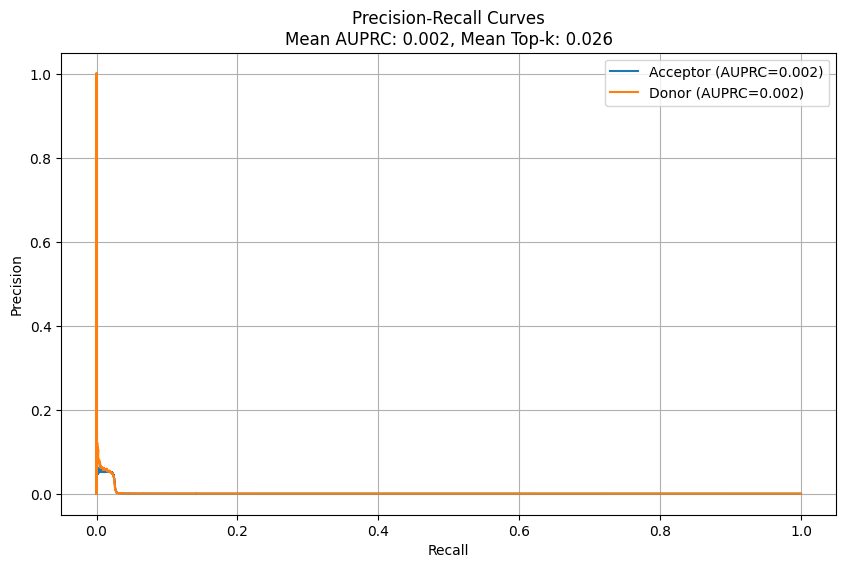

Acceptor AUPRC: 0.0016, Top-k: 0.0259
Donor AUPRC: 0.0018, Top-k: 0.0256
Mean AUPRC: 0.0017, Mean Top-k: 0.0257


In [4]:
# Calculate mean metrics
mean_auprc = (acc_auprc + don_auprc) / 2
mean_topk = (acc_topk + don_topk) / 2

# Plot precision-recall curves
plt.figure(figsize=(10, 6))
plt.plot(acc_recall, acc_precision, label=f'Acceptor (AUPRC={acc_auprc:.3f})')
plt.plot(don_recall, don_precision, label=f'Donor (AUPRC={don_auprc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curves\nMean AUPRC: {mean_auprc:.3f}, Mean Top-k: {mean_topk:.3f}')
plt.legend()
plt.grid(True)
plt.savefig("auprc_topk_pangolin.png", dpi=300)
plt.show()

# Print results
print(f"Acceptor AUPRC: {acc_auprc:.4f}, Top-k: {acc_topk:.4f}")
print(f"Donor AUPRC: {don_auprc:.4f}, Top-k: {don_topk:.4f}")
print(f"Mean AUPRC: {mean_auprc:.4f}, Mean Top-k: {mean_topk:.4f}")

In [6]:
for chrom in donor_truth.keys():
   truth_sites = np.where(donor_truth[chrom] == 1)[0][:200]
   pred_sites = np.where(donor_pred[chrom] > 0.8)[0][:200]
   
   print(f"\n{chrom}")
   print("Truth sites:", truth_sites)
   print("Predicted sites (>0.9):", pred_sites)


chr1
Truth sites: [  65432   65572   71584  924947  925799  926012  930335  931088  935895
  939128  939411  939459  941305  942250  942487  943057  943376  943807
  944573  960799  961551  961749  962046  962470  962916  963252  963503
  964007  964179  964529  965718  966613  966802  970422  970600  970757
  971005  971207  971403  972149  972423  973009  973325  973639  974050
  974363  975007  975864 1013575 1014539 1020372 1022461 1034702 1035323
 1040879 1041396 1041701 1042161 1043456 1043731 1044022 1044256 1044438
 1045276 1045522 1045875 1046087 1046264 1046734 1046956 1047453 1047686
 1047894 1048364 1049058 1049450 1049794 1050036 1050328 1050590 1050836
 1051368 1051644 1051814 1053976 1054550 1056115 1056118 1173925 1174320
 1174488 1179332 1179736 1180339 1180600 1180859 1181814 1182445 1183046
 1184090 1185108 1196715 1197185 1197935 1235040 1280665 1281296 1281609
 1282314 1284089 1285663 1286277 1286974 1287298 1287595 1287835 1288036
 1290387 1290554 1290693 1290952

In [1]:
for chrom in acceptor_truth.keys():
   truth_sites = acceptor_truth[chrom][962470-20:962470+20]
   pred_sites = acceptor_pred[chrom][962470-20:962470+20]
   
   print(f"\n{chrom}")
   print(truth_sites)
   print(pred_sites)

NameError: name 'acceptor_truth' is not defined